# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 1. Add noise

In [3]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0
noise_train = np.random.normal(0.5, 0.05, (60000, 28, 28, 1))
noise_test = np.random.normal(0.5, 0.05, (10000, 28, 28, 1))
x_train2 = x_train + noise_train
x_test2 = x_test + noise_test

In [4]:
#check the minimun and maximum value of the noise

print(np.max(noise_train))
print(np.min(noise_train))
print(np.max(noise_test))
print(np.min(noise_test))

0.7937039777445263
0.22592893773982398
0.790001239714075
0.23102239788898254


## 2. Compare Accuracy

### 2-A. Accuracy without noise = 83.89%

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/12


469/469 [==============================] - 67s 137ms/step - loss: 2.2815 - accuracy: 0.1424 - val_loss: 2.2540 - val_accuracy: 0.2601
Epoch 2/12
469/469 [==============================] - 71s 150ms/step - loss: 2.2349 - accuracy: 0.2375 - val_loss: 2.1969 - val_accuracy: 0.4094
Epoch 3/12
469/469 [==============================] - 64s 136ms/step - loss: 2.1766 - accuracy: 0.3216 - val_loss: 2.1215 - val_accuracy: 0.5204
Epoch 4/12
469/469 [==============================] - 63s 134ms/step - loss: 2.0958 - accuracy: 0.4020 - val_loss: 2.0188 - val_accuracy: 0.6073
Epoch 5/12
469/469 [==============================] - 68s 144ms/step - loss: 1.9894 - accuracy: 0.4690 - val_loss: 1.8816 - val_accuracy: 0.6847
Epoch 6/12
469/469 [==============================] - 65s 139ms/step - loss: 1.8534 - accuracy: 0.5320 - val_loss: 1.7092 - val_accuracy: 0.7397
Epoch 7/12
469/469 [==============================] - 58s 123ms/step - loss: 1.6922 - accuracy: 0.5810 - val_loss: 1.5123 - va

### 2-B. Accuracy with noise = 87.22%

In [6]:
model.fit(x_train2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test2, y_test))
score = model.evaluate(x_test2, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 62s 131ms/step - loss: 1.2414 - accuracy: 0.5860 - val_loss: 0.7409 - val_accuracy: 0.8406
Epoch 2/12
469/469 [==============================] - 58s 125ms/step - loss: 1.0687 - accuracy: 0.6628 - val_loss: 0.7181 - val_accuracy: 0.8469
Epoch 3/12
469/469 [==============================] - 58s 125ms/step - loss: 1.0200 - accuracy: 0.6833 - val_loss: 0.6873 - val_accuracy: 0.8491
Epoch 4/12
469/469 [==============================] - 57s 121ms/step - loss: 0.9890 - accuracy: 0.6926 - val_loss: 0.6576 - val_accuracy: 0.8518
Epoch 5/12
469/469 [==============================] - 58s 125ms/step - loss: 0.9613 - accuracy: 0.7024 - val_loss: 0.6308 - val_accuracy: 0.8561
Epoch 6/12
469/469 [==============================] - 56s 119ms/step - loss: 0.9321 - accuracy: 0.7112 - val_loss: 0.6063 - val_accuracy: 0.8580
Epoch 7/12
469/469 [==============================] - 58s 123ms/step - loss: 0.9051 - accuracy: 0.7191 - val_loss: 0.5850 - val_ac

### Result: Accuracy increased by 3.33%p due to the noise (Why??)

## 3. Vary noises

In [7]:
accuracy_score = []
noise_scale = [.1, .5, 1.0, 2.0, 4.0]

#set for loop to see scores for each scale of noise
for scale in noise_scale:
    
    noise_train = np.random.normal(0.5, scale, (60000, 28, 28, 1))
    noise_test = np.random.normal(0.5, scale, (10000, 28, 28, 1))
    x_train3 = x_train + noise_train
    x_test3 = x_test + noise_test
    
    history3 = model.fit(x_train3, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test3, y_test))
    
    score3 = model.evaluate(x_test3, y_test, verbose=0)
    accuracy = score3[1]
    accuracy_score.append(accuracy)

Epoch 1/12
469/469 [==============================] - 74s 155ms/step - loss: 0.8023 - accuracy: 0.7506 - val_loss: 0.4999 - val_accuracy: 0.8735
Epoch 2/12
469/469 [==============================] - 71s 151ms/step - loss: 0.7900 - accuracy: 0.7533 - val_loss: 0.4887 - val_accuracy: 0.8748
Epoch 3/12
469/469 [==============================] - 65s 138ms/step - loss: 0.7760 - accuracy: 0.7554 - val_loss: 0.4787 - val_accuracy: 0.8762
Epoch 4/12
469/469 [==============================] - 67s 142ms/step - loss: 0.7639 - accuracy: 0.7599 - val_loss: 0.4700 - val_accuracy: 0.8784
Epoch 5/12
469/469 [==============================] - 65s 138ms/step - loss: 0.7511 - accuracy: 0.7640 - val_loss: 0.4606 - val_accuracy: 0.8806
Epoch 6/12
469/469 [==============================] - 66s 142ms/step - loss: 0.7371 - accuracy: 0.7700 - val_loss: 0.4520 - val_accuracy: 0.8807
Epoch 7/12
469/469 [==============================] - 66s 140ms/step - loss: 0.7262 - accuracy: 0.7734 - val_loss: 0.4439 - val_ac

In [8]:
print(accuracy_score)

[0.8865000009536743, 0.8525999784469604, 0.7311999797821045, 0.4729999899864197, 0.2337000072002411]


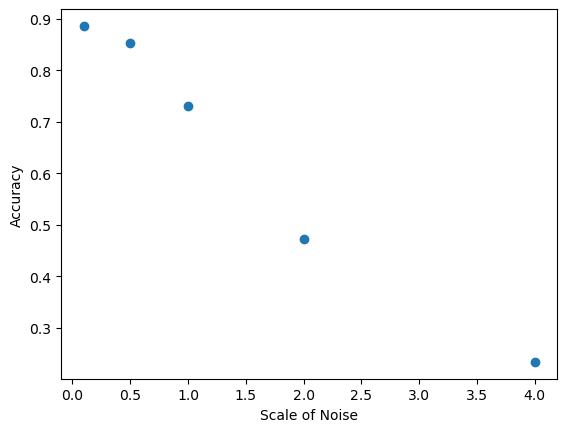

In [9]:
plt.scatter(noise_scale, accuracy_score)
plt.xlabel('Scale of Noise')
plt.ylabel('Accuracy')
plt.show()

## Result: The accuracy significantly dropped as scale of noise increased

## 4. Compare noises with the result of the previous week

                Scale of Noise :  0.1                   0.5                  1.0                 2.0                  4.0
- Accuracy Score Using Multilayer: [0.9778000116348267, 0.9319999814033508, 0.7793999910354614, 0.44780001044273376, 0.22589999437332153]
- Accuracy Score Using ConvNet:    [0.8865000009536743, 0.8525999784469604, 0.7311999797821045, 0.4729999899864197, 0.2337000072002411]

## Result: In lower noises(scale =< 1.0), the accuracy scores of Multilayer were higher; in high noises(scale >= 2.0), the accuracy scores of ConvNet were higher. 